# ▒  Keras를 활용한 인공신경망 실습 ▒
    
MNIST data 사용

## 0. 환경설정

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Input

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 1. 데이터 확인

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# 데이터 포맷 확인
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


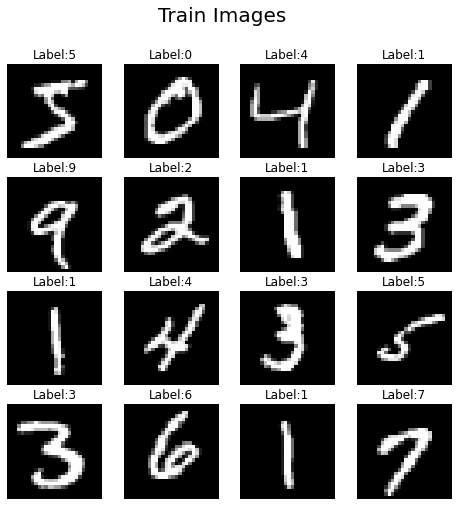

In [ ]:
# train 이미지 확인
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i+1)                    # plt.subplot(row, column, index)
    plt.suptitle('Train Images', fontsize=20) # 하나의 큰 제목 설정
    plt.title('Label:'+str(y_train[i]))               # 각 이미지마다 제목 설정
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.axis("off")

plt.show()

## 2. 전처리
### 2.1 이미지 데이터 전처리

In [ ]:
x_train = x_train.astype('float32')      # data type을 float32로 변경
x_train = x_train/255                    # normalization 진행

x_test = x_test.astype('float32')
x_test = x_test/255

### 2.2 레이블 데이터 전처리

In [ ]:
y_onehot_train = to_categorical(y_train, num_classes=10) # one-hot encoding을 하여 10개의 레이블이 0, 1로 표현되도록 변경
y_onehot_test = to_categorical(y_test, num_classes=10)

In [ ]:
y_onehot_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# 전처리 결과
for i in [x_train, y_onehot_train, x_test, y_onehot_test]:
    print(i.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


## 3. keras를 활용한 모델 생성
### 3.1 신경망 모델에 들어가는 hyper parameter 설정

In [ ]:
OUTPUT_SHAPE = 10         # 출력 데이터가 나오는 포멧 설정
BATCH_SIZE = 128          # 한 번에 처리할 데이터량 설정
EPOCHS = 20               # 신경망을 학습할 횟수
VERBOSE = 1               # 학습 진행 상황 출력 모드 설정 

### 3.2 신경망 모델 생성

In [ ]:
model = Sequential([
  Input(shape=(28,28,)),
  Flatten(),
  Dense(128), 
  Activation('relu'),
  Dense(64), 
  Activation('relu'),
  Dense(10),
  Activation('softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 activation_2 (Activation)   (None, 10)                0

### 3.3 신경망 모델 컴파일

In [ ]:
model.compile(
    optimizer='adam',   #sgd
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 4. 신경망 모델 학습

In [ ]:
history = model.fit(
    x_train, y_onehot_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 4s 4ms/step - loss: 0.3671 - accuracy: 0.8951 - val_loss: 0.1794 - val_accuracy: 0.9496
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1507 - accuracy: 0.9554 - val_loss: 0.1374 - val_accuracy: 0.9590
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1055 - accuracy: 0.9683 - val_loss: 0.1114 - val_accuracy: 0.9672
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0793 - accuracy: 0.9768 - val_loss: 0.0987 - val_accuracy: 0.9713
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0910 - val_accuracy: 0.9738
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0912 - val_accuracy: 0.9737
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.0934 - val_accuracy: 0.9732
Epoch 

## 5. 결과 확인

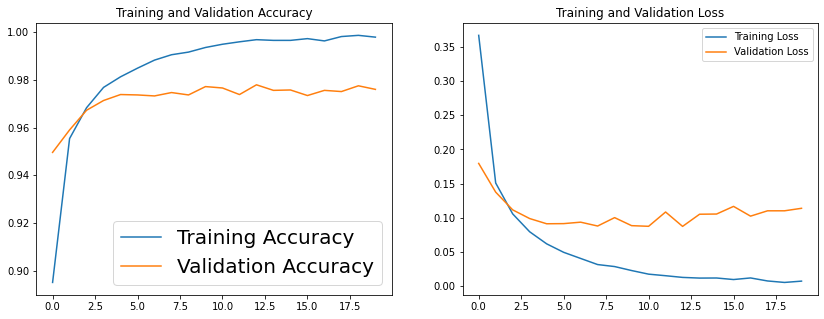

In [ ]:
# accuracy, loss 그래프

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=20)
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

## 6. 신경망 모델 평가
### 6.1 테스트 데이터를 이용한 평가

In [ ]:
model.evaluate(x_test, y_onehot_test)    # loss와 accuracy 반환

313/313 [==============================] - 1s 2ms/step - loss: 0.1070 - accuracy: 0.9753


[0.10703232139348984, 0.9753000140190125]

### 6.2 모델 예측

In [ ]:
y_pred_enc = model.predict(x_test)  
y_pred_enc[0:5]

313/313 [==============================] - 0s 1ms/step


array([[5.8055638e-13, 5.0604317e-12, 2.0433160e-09, 1.5869897e-07,
        3.0517908e-18, 2.4893547e-11, 1.1518255e-18, 9.9999988e-01,
        1.9909208e-10, 1.4269998e-10],
       [2.4147393e-16, 6.1468101e-11, 1.0000000e+00, 6.3657808e-15,
        1.9881585e-25, 3.1237796e-19, 1.7529453e-17, 1.1923716e-17,
        9.8974529e-13, 9.8777968e-25],
       [4.9680660e-09, 9.9999642e-01, 9.2585492e-07, 3.5148995e-09,
        3.0009087e-08, 3.2593228e-10, 6.9521349e-08, 2.0496550e-06,
        4.2197584e-07, 3.2449214e-09],
       [1.0000000e+00, 5.3566032e-14, 4.2656385e-08, 1.5257410e-14,
        4.4616415e-17, 2.7485573e-11, 8.2216323e-09, 1.9668452e-13,
        7.8274090e-13, 5.3617601e-12],
       [1.8055380e-12, 2.1847367e-14, 1.6672019e-12, 7.7900185e-16,
        9.9999487e-01, 2.0601641e-13, 6.3981426e-14, 2.6093883e-09,
        6.8333052e-12, 5.1045540e-06]], dtype=float32)

In [ ]:
y_pred_enc = model.predict(x_test)          # one-hot encoding된 label 예측값
y_pred = [np.argmax(i) for i in y_pred_enc] # label 예측값

313/313 [==============================] - 0s 1ms/step


In [ ]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
y_pred[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

### 6.3 혼동 행렬(confusion_matrix)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(matrix)
        
df

,0,1,2,3,4,5,6,7,8,9
0,965,0,0,1,1,2,3,2,3,3
1,0,1122,3,2,0,1,1,3,3,0
2,5,0,994,4,2,1,3,9,13,1
3,0,0,2,982,0,11,0,3,4,8
4,1,0,2,0,943,2,5,1,2,26
5,1,0,0,8,1,879,0,1,1,1
6,3,2,1,2,4,14,929,0,3,0
7,1,1,4,4,3,0,0,1006,4,5
8,0,0,3,5,3,5,0,2,953,3
9,1,1,0,2,8,6,0,10,1,980
